In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from scipy import stats


In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#lab6

X=data.drop("Total Claim Amount", axis=1)
y=data["Total Claim Amount"]
numerical_cols = X.select_dtypes(include=['float', 'int']).columns
X_num = X[numerical_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
data[numerical_cols] = X_scaled

categorical_cols = list(data.select_dtypes(include=["object"]).columns)
X_cat = data[categorical_cols]
encoder = LabelEncoder()
X_encoded = X_cat.apply(encoder.fit_transform)
data[categorical_cols] = X_encoded

y=data['Total Claim Amount']
X=data.drop("Total Claim Amount",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_train)

r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.6103277323286401
33337.10337985019
182.58451024073807
131.77794803199328


<AxesSubplot:>

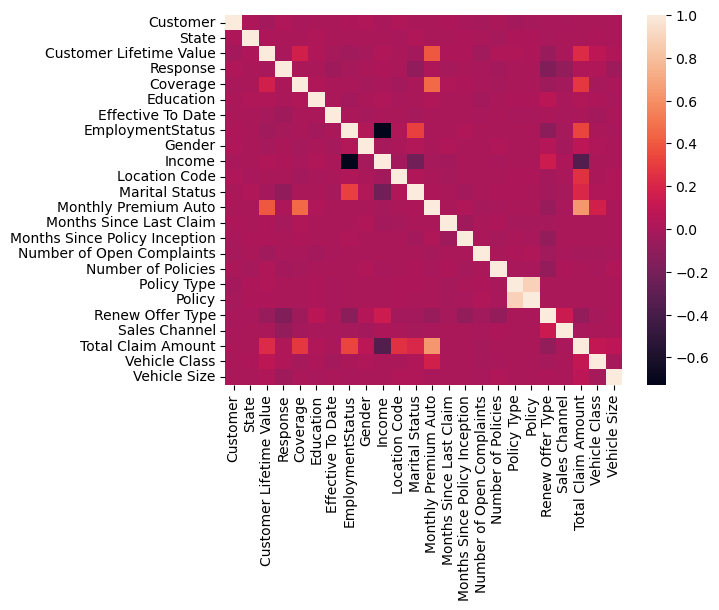

In [4]:
import seaborn as sns

corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=False)

<AxesSubplot:>

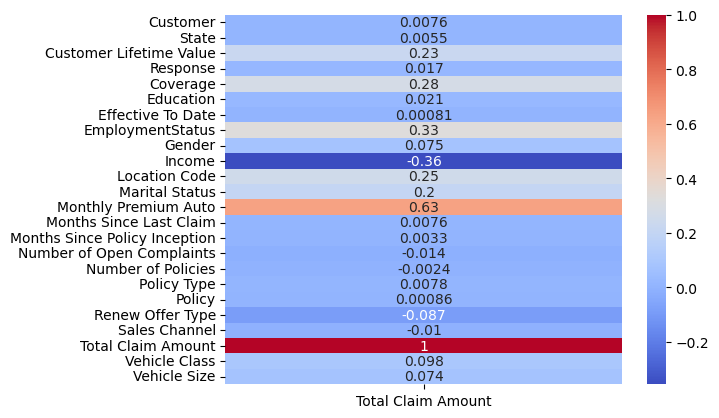

In [5]:
corr_matrix = data.corr()[["Total Claim Amount"]]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [6]:
data_drop = list(corr_matrix[abs(corr_matrix["Total Claim Amount"]) < 0.0].index)
data_drop

[]

In [7]:
data_clean=data.drop(data_drop, axis=1)

In [8]:
data_clean

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,4,-0.762878,0,0,0,47,1,0,0.612827,...,-1.543287,-0.422250,-0.822648,0,2,0,0,384.811147,5,1
1,5946,0,-0.149245,0,1,0,24,4,0,-1.239617,...,-0.217334,-0.422250,2.106160,1,5,2,0,1131.464935,0,1
2,96,2,0.710636,0,2,0,41,1,0,0.365710,...,-0.360680,-0.422250,-0.404247,1,5,0,0,566.472247,5,1
3,8016,1,-0.052263,0,0,0,12,4,1,-1.239617,...,0.606907,-0.422250,1.687759,0,1,0,2,529.881344,3,1
4,2488,4,-0.755575,0,0,0,52,1,1,0.203390,...,-0.145661,-0.422250,-0.822648,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,2.241590,0,0,0,32,1,1,1.128558,...,1.466984,-0.422250,-0.404247,1,3,1,3,198.234764,0,1
9130,5390,1,-0.714411,1,1,1,34,1,0,-0.528450,...,-0.719046,-0.422250,-0.822648,0,2,0,1,379.200000,0,1
9131,6688,1,0.023135,0,1,0,55,4,1,-1.239617,...,-0.396517,2.873245,-0.404247,0,1,0,1,790.784983,0,1
9132,7214,1,-0.069935,0,1,1,52,1,1,-0.517356,...,-1.614960,-0.422250,0.014154,1,4,2,1,691.200000,0,0


<AxesSubplot:>

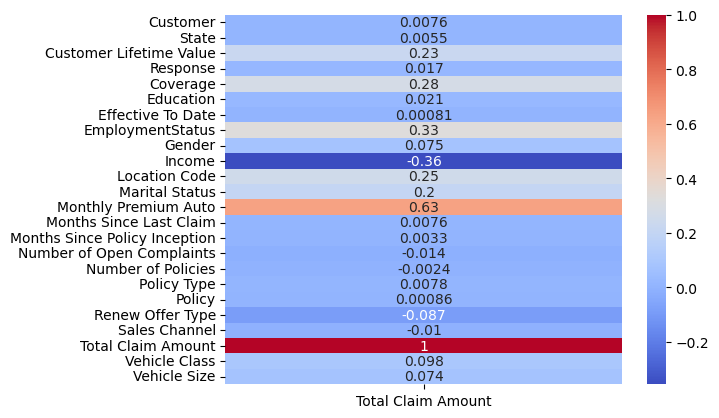

In [9]:
corr_matrix = data_clean.corr()[["Total Claim Amount"]]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

<AxesSubplot:>

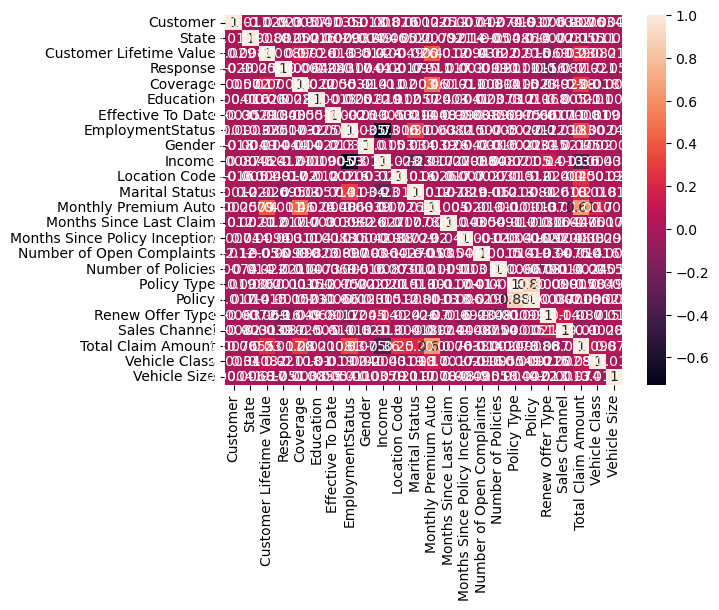

In [10]:
import seaborn as sns

corr_matrix=data_clean.corr()
sns.heatmap(corr_matrix,annot=True)

In [11]:
y=data_clean['Total Claim Amount']
X=data_clean.drop("Total Claim Amount",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_train)

r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.6103277323286401
33337.10337985019
182.58451024073807
131.77794803199328


In [12]:
"""
Used correlation heatmap and decided to get rid with columns less than .1 correlation, the r2 was affected. 
Then changed to .05 and it was affected also. So, I returned to original dataframe, will try other methods 
before checkin back at this, to try and improve the r2
"""
print()

In [13]:
# METHOD MINMAX

data2=pd.read_csv("marketing_customer_analysis.csv")
data2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
numerical_cols = data2.select_dtypes(include=['float', 'int']).columns
X_num = data2[numerical_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_num)
data2[numerical_cols] = X_scaled

categorical_cols = list(data2.select_dtypes(include=["object"]).columns)
X_cat = data2[categorical_cols]
encoder = LabelEncoder()
X_encoded = X_cat.apply(encoder.fit_transform)
data2[categorical_cols] = X_encoded

y=data2['Total Claim Amount']
X=data2.drop("Total Claim Amount",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_train)

r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.61032773232864
0.003982802405381857
0.0631094478297969
0.04554840673766646


In [15]:
"""
Using MinMax Method, the result is nearly the same.But there is a slight improvement, next we will use a different test split ratio.
"""
print()

In [24]:
data3=pd.read_csv("marketing_customer_analysis.csv")

numerical_cols = data3.select_dtypes(include=['float', 'int']).columns
X_num = data3[numerical_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_num)
data3[numerical_cols] = X_scaled

categorical_cols = list(data3.select_dtypes(include=["object"]).columns)
X_cat = data3[categorical_cols]
encoder = LabelEncoder()
X_encoded = X_cat.apply(encoder.fit_transform)
data3[categorical_cols] = X_encoded

y=data3['Total Claim Amount']
X=data3.drop("Total Claim Amount",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_train)

r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)

0.6081564785859803
0.004003919946387052
0.06327653551188665
0.045688323071919654


In [25]:
"""
This did not help. Remained the same.
"""
print()

In [33]:
data4=pd.read_csv("marketing_customer_analysis.csv")

categorical_cols = list(data4.select_dtypes(include=["object"]).columns)
X_cat = data4[categorical_cols]
encoder = LabelEncoder()
X_encoded = X_cat.apply(encoder.fit_transform)
data4[categorical_cols] = X_encoded

for col in numerical_cols:
    if (data4[col] > 0).all():
        data4[col], lmbda = stats.boxcox(data4[col])


y=data4['Total Claim Amount']
X=data4.drop("Total Claim Amount",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lm=linear_model.LinearRegression().fit(X_train,y_train)

predictions=lm.predict(X_train)

r2=r2_score(y_train,predictions)
mean_squared=mean_squared_error(y_train,predictions)
root_mean_squared = np.sqrt(mean_squared)
mean_absolute=mean_absolute_error(y_train,predictions)

print(r2)
print(mean_squared)
print(root_mean_squared)
print(mean_absolute)




0.552407605155196
62.40217886279881
7.899504975806953
6.124368958652404


In [ ]:
"""
This did not help. It got worse
"""